## Linear Regression

### Input: Feature vector of size n

### Output: 
(1) k,d of lin. reg.
(2) linear extrapolation of

In [117]:
import numpy as np
import hnumpy as hnp
import matplotlib.pyplot as plt

In [118]:
def LR_denom(formula = 0):
    if formula == 0:
        return len(X) * np.sum(X**2) - np.sum(X)**2
    elif formula == 1:
        return np.sum((X-np.mean(X))**2)

In [119]:
N = 32
X = np.linspace(0,1,N)
max_x = np.max(X)

In [120]:
a = np.array(range(4))
b = np.array(range(4))
a.dot(b)

14

### Function Definition

In [126]:
N = len(X)
Sx = np.sum(X)
Sxx = np.dot(X,X)
denom = LR_denom(0)

def linreg(y):
    Sy  = np.sum(y)
    Sxy = np.dot(y,X)
    
    k = (N * Sxy - Sx * Sy) / denom
    
    d = (Sy * Sxx - Sx * Sxy) / denom
    
    return (k,d)

def k(y):
    Sy  = np.sum(y)
    Sxy = np.sum(np.multiply(y,X))
    
    k = (N * Sxy - Sx * Sy) / denom
    
    return k

def k_const(y):
    return y

### HNP Compilation

In [127]:
he_linreg = hnp.compile_fhe(
    linreg,
    { "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)) }
)

he_k = hnp.compile_fhe(
    k,
    { "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)) }
)

2022-01-12 12:52:54.692 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling linreg into an FHE function
2022-01-12 12:52:54.698 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-12 12:52:54.702 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-12 12:52:54.706 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-12 12:52:54.727 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-12 12:52:54.728 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-12 12:52:54.730 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-12 12:52:54.731 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling k into an FHE function
2022-01-12 12:52:54.732 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-12 12:52:54.733 | INFO     | hnumpy.convert:compile_homomorphic:2

### Forumla 2

In [132]:
def k(y):
    return np.sum(np.multiply(X-np.mean(X),y-np.mean(y))) / np.sum((X-np.mean(X))**2)

he_k = hnp.compile_fhe(
    k,
    { "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)) }
)

2022-01-12 13:17:58.575 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling k into an FHE function
2022-01-12 13:17:58.577 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-12 13:17:58.579 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-12 13:17:58.581 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-12 13:17:58.609 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-12 13:17:58.611 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-12 13:17:58.612 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller


### Clear Computation

In [133]:
def getY(X):
    return 0.2 + X * 0.42 + np.random.uniform(-0.025, 0.025, len(X))

ys = getY(X)

In [134]:
print( linreg(ys) )
print( k(ys) )

(0.42310426062652995, 0.19909501613790703)
0.4231042606265296


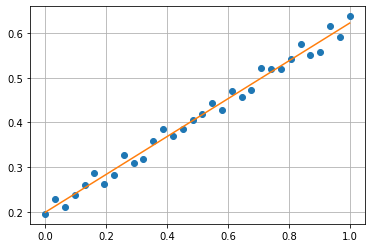

In [135]:
_k,_d = linreg(ys)

xreg = np.linspace(0,max_x,50)
yreg = _k * xreg + _d

plt.plot(X,ys, "o")
plt.plot(xreg,yreg)
plt.grid()
plt.show()

### HNP Simulation

In [136]:
k(ys)

0.4231042606265296

In [137]:
he_k.simulate(ys)

array([0.41916569])

2022-01-12 14:07:27.292 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling k into an FHE function
2022-01-12 14:07:27.294 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-12 14:07:27.295 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-12 14:07:27.297 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-12 14:07:27.324 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-12 14:07:27.326 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-12 14:07:27.327 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-12 14:07:27.759 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling k into an FHE function
2022-01-12 14:07:27.760 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-12 14:07:27.761 | INFO     | hnumpy.convert:compile_homomorphic:265 - 

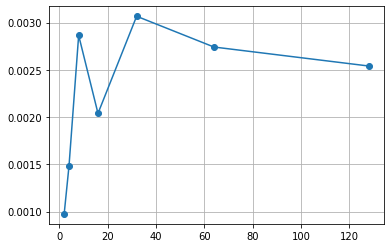

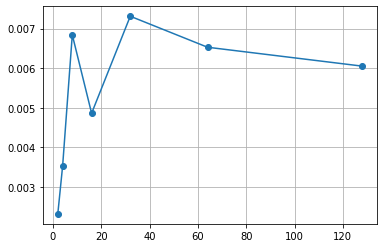

In [144]:
rounds = 1000
errors, relerr, k_real, k_homo = [],[],[],[]
nmax = 7
for n in range(1,nmax+1):
    N = 2**n
    X = np.linspace(0,max_x,N)
    Sx = np.sum(X)
    Sxx = np.dot(X,X)
    denom = LR_denom(0)
    
#     def k(y):
#         Sy  = np.sum(y)
#         Sxy = np.sum(y*X)
#         k = (N * Sxy - Sx * Sy) / denom
#         return k
    def k(y):
        return np.sum(np.multiply(X-np.mean(X),y-np.mean(y))) / np.sum((X-np.mean(X))**2)


    he_k = hnp.compile_fhe(
        k,
        { "y": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,)) }
    )
    
    err, rer = 0, 0
    for r in range(rounds):
        Y = getY(X)
        actual = k(Y)
        homom  = he_k.simulate(Y)
        
        #k_real.append(actual)
        #k_homo.append(homom)
        
        e = np.abs(homom - actual)
        err += e
        rer += e / actual
        
    errors.append(err / rounds)
    relerr.append(rer / rounds)

# plt.plot(k_real, k_homo, "o")
# plt.grid()
# _x = np.linspace(min(k_real),max(k_real),100)
# plt.plot(_x,_x)
# plt.xlabel("expected result")
# plt.ylabel("actual result")
# plt.title("Linear Regression\nComputation of slope")
# plt.show()

x_axis = [2**n for n in range(1,nmax+1)]
plt.plot(x_axis, errors, "o-")
plt.grid()
plt.show()

plt.plot(x_axis, relerr, "o-")
plt.grid()
plt.show()

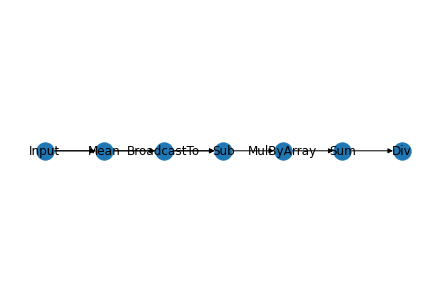

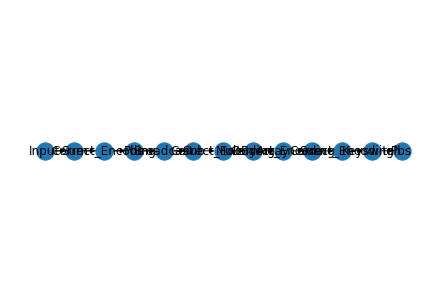

In [139]:
he_k.draw_intermediate_graph()

he_k.draw_target_graph()